# KMeans Intro

## Generate Some Random Data

X.shape: (1000, 2)
y.shape: (1000,)


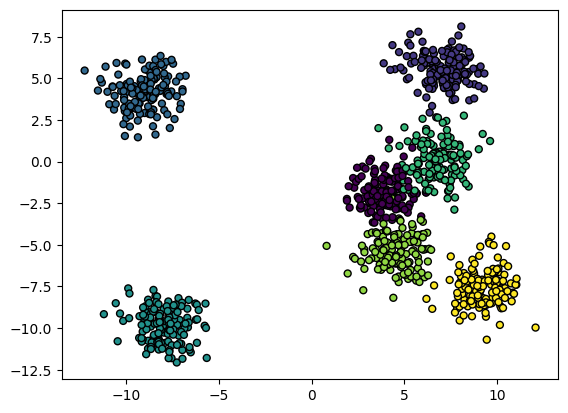

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

num_centers = 7

X, y = make_blobs(n_samples=1000,  n_features=2, centers=num_centers)

print ('X.shape:', X.shape)
print ('y.shape:', y.shape)

# note the color coding of clusters
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

## KMeans

In [8]:
from sklearn.cluster import KMeans
import numpy as np

## TODO: number of clusters should equal to 'num_centers'
## but let's start with a mis-match:  -1, +1,  0
# k = num_centers - 1
# k = num_centers + 1
k = num_centers

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
## Note: here we are only fitting X.
## In supervised method we would fit X and y   (algo.fit (X, y))
## Can you explain this?

# now kmeans will predict clusters
y_pred = kmeans.predict(X)
print ('k:', k, ', wssse:', kmeans.inertia_)
print ('predicted y_pred (10) = ', np.random.choice(y_pred, 10))
print ("cluster centers:\n", kmeans.cluster_centers_)

k: 7 , wssse: 2003.9272793972777
predicted y_pred (10) =  [3 4 5 4 6 0 0 6 6 0]
cluster centers:
 [[ 9.22775572 -7.56133351]
 [-8.98405106  4.14815752]
 [ 3.9832571  -1.81206494]
 [-7.94379374 -9.82927817]
 [ 7.03666494  5.53122665]
 [ 4.54610919 -5.52313032]
 [ 6.83682041  0.11489753]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


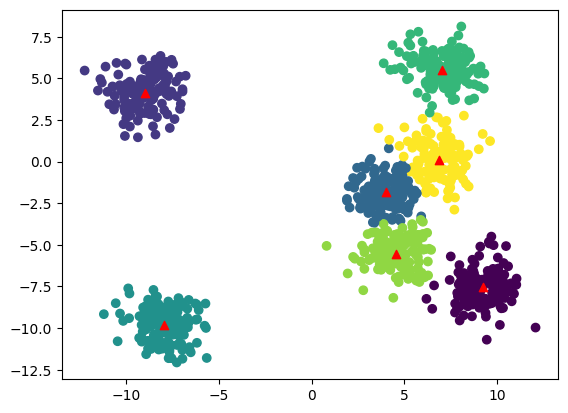

In [9]:
## plot kmeans predicted results

## now observe the color coding of clusters
## do they match?
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:][0:,0], kmeans.cluster_centers_[:][0:,1], marker='^', c='red')

## WSSSE

let's iterate over some Ks

In [10]:
kvals = []
wssses = []

for k in range(2, num_centers + 3):
    kmeans = KMeans(n_clusters=k, random_state=0)
    model = kmeans.fit(X)
    wssse = model.inertia_
    print ("k={},  wssse={}".format(k,wssse))
    kvals.append(k)
    wssses.append(wssse)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

k=2,  wssse=33433.33312419664
k=3,  wssse=19387.09779068623
k=4,  wssse=8622.537548542889
k=5,  wssse=4580.218405186501
k=6,  wssse=2756.116155328912
k=7,  wssse=2003.979292107731
k=8,  wssse=1884.7033119577973
k=9,  wssse=1768.5004773883256


In [11]:
import pandas as pd

df_wssse = pd.DataFrame({'k': kvals, 'wssse':wssses})
df_wssse

,k,wssse
0,2,33433.333124
1,3,19387.097791
2,4,8622.537549
3,5,4580.218405
4,6,2756.116155
5,7,2003.979292
6,8,1884.703312
7,9,1768.500477


<Axes: xlabel='k'>

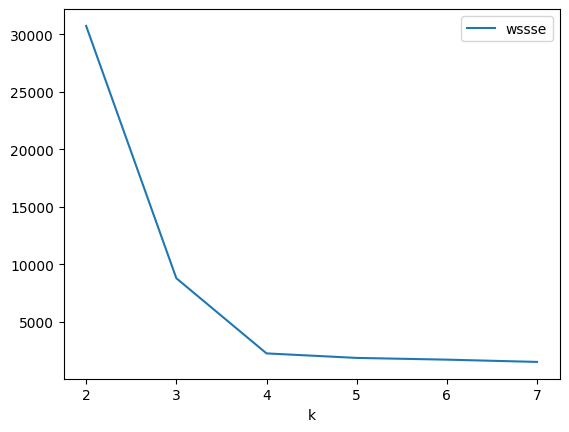

In [6]:
df_wssse.plot(x="k")

## Silhouette Score

- Silhouette score ranges from -1 to +1.
- Lower the values the worse performance
- Scores close to 0 will indicate overlapping clusters

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html


In [12]:
from  sklearn.metrics import silhouette_score

sil_score = silhouette_score (X, y_pred)

print ("silhoutte_score : ", sil_score)

silhoutte_score :  0.6456699582538827


In [13]:
# Let's loop through a few ranges
sil_scores = []
kvals = []

for k in range(2, num_centers+3):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    sil_score = silhouette_score (X, y_pred)
    kvals.append(k)
    sil_scores.append(sil_score)
    print ("k={}, silhoutte_score : {:.2f}".format(k, sil_score))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2, silhoutte_score : 0.60
k=3, silhoutte_score : 0.67
k=4, silhoutte_score : 0.59
k=5, silhoutte_score : 0.62
k=6, silhoutte_score : 0.63
k=7, silhoutte_score : 0.65


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=8, silhoutte_score : 0.57
k=9, silhoutte_score : 0.56


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
import pandas as pd

df_sil = pd.DataFrame({'k': kvals, 'sil_score':sil_scores})
df_sil

,k,sil_score
0,2,0.601915
1,3,0.671624
2,4,0.587395
3,5,0.616930
4,6,0.633080
5,7,0.645670
6,8,0.572575
7,9,0.557813


<Axes: xlabel='k'>

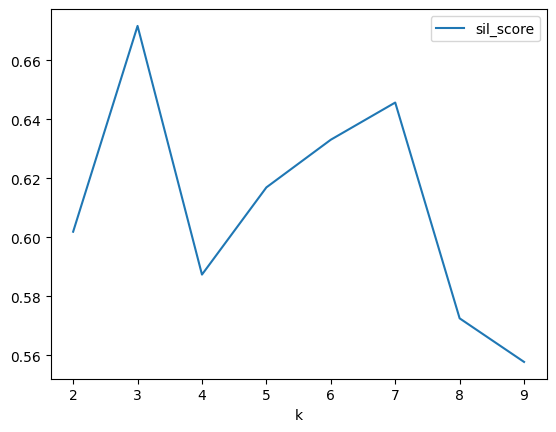

In [15]:
df_sil.plot(x="k")

## Calinski-Harabasz Index

- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
- The score is fast to compute.
- The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index

In [16]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score (X, y_pred)
print ("calinski_harabasz_score : ", ch_score)

calinski_harabasz_score :  5309.179582946174


In [17]:
# Let's loop through a few ranges

ch_scores = []
kvals = []

for k in range(2, num_centers+3):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    ch_score = calinski_harabasz_score (X, y_pred)
    ch_scores.append(ch_score)
    kvals.append(k)
    print ("k={}, calinski_harabasz_score : {:,.2f}".format(k, ch_score))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2, calinski_harabasz_score : 1,333.16


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=3, calinski_harabasz_score : 1,509.54


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4, calinski_harabasz_score : 2,674.91


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5, calinski_harabasz_score : 3,992.70


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=6, calinski_harabasz_score : 5,434.03


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=7, calinski_harabasz_score : 6,283.95


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=8, calinski_harabasz_score : 5,731.54


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=9, calinski_harabasz_score : 5,357.13


In [18]:
import pandas as pd

df_ch = pd.DataFrame({'k': kvals, 'ch_score':ch_scores})
df_ch

,k,ch_score
0,2,1333.158351
1,3,1509.544215
2,4,2674.906765
3,5,3992.697501
4,6,5434.025411
5,7,6283.953725
6,8,5731.544419
7,9,5357.134113


<Axes: xlabel='k'>

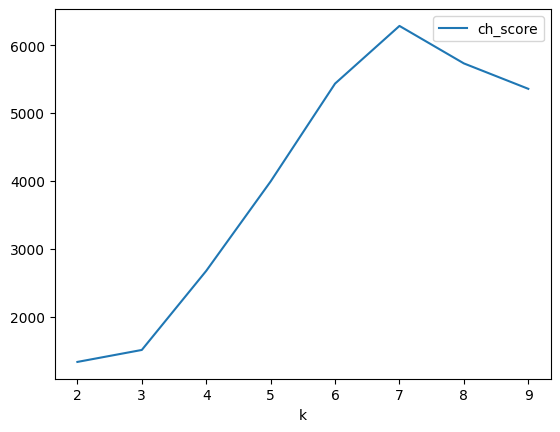

In [19]:
df_ch.plot(x="k")

## Choose the Optimal K

From above experiments, choose a K that is scoring high. 

For example k=4

And visualize the results

In [20]:
import numpy as np

# using Silhouette Score
max_index_of_score = np.argmax(df_sil['sil_score'])
optimal_k = df_sil['k'].iloc[max_index_of_score]
print ("From Silhouette Score, optimal k=", optimal_k)

# from ch_scores
max_index_of_score = np.argmax(df_ch['ch_score'])
optimal_k = df_ch['k'].iloc[max_index_of_score]
print ("From Calinski-Harabasz, optimal k=", optimal_k)


From Silhouette Score, optimal k= 3
From Calinski-Harabasz, optimal k= 7


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


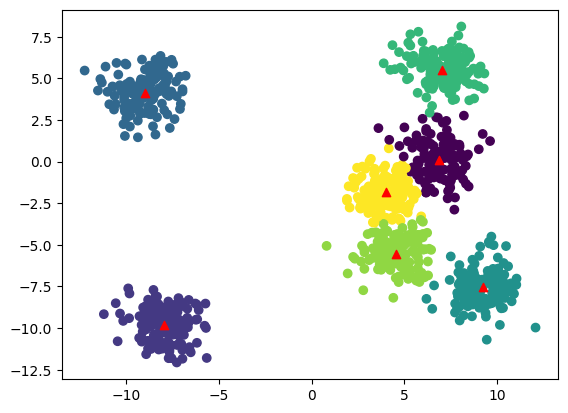

In [22]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X)

# now kmeans will predict clusters
y_pred = kmeans.predict(X)
y_pred

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:][0:,0], kmeans.cluster_centers_[:][0:,1], marker='^', c='red')

## End

---

## Combine Scores

In [ ]:
sil_scores = []
ch_scores = []

k_vals = (num_centers - 1, num_centers, num_centers + 1)

for k in k_vals:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    
    sil_score = silhouette_score (X, y_pred)
    sil_scores.append(sil_score)
    
    ch_score = calinski_harabasz_score (X, y_pred)
    ch_scores.append(ch_score)
    
    print ("k={},  silhoutte_score={}, calinski_harabasz_score={}".format(k,sil_score,ch_score ))

In [ ]:
import pandas as pd

df = pd.DataFrame({'k': k_vals, 'silhoutte_score':sil_scores, 'calinski_harabasz_score':ch_scores})
df

In [ ]:
%matplotlib inline
from matplotlib import pyplot

df.plot(x="k", y=["silhoutte_score", "calinski_harabasz_score"], kind="bar", 
        secondary_y=['calinski_harabasz_score'], figsize=(9, 6))